# Sources
https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html

# Exploratory Data Analysis (EDA)

In [140]:

import pandas as pd

# Load the dataset
df = pd.read_csv('aggregated_plants.csv')

# Dropping non-relevant columns
df = df.drop(columns=['Plant_Species', 'Reference', 'BitInterpretations'])

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

# Display the shape of the dataset after dropping non-relevant columns
print("Shape of the dataset (rows, columns) after dropping non-relevant columns:")
print(df.shape)

# Display the number of features (columns) and observations (rows)
num_features = df.shape[1] - 1  # subtracting 1 for the target column
num_observations = df.shape[0]
print(f"Number of features: {num_features}")
print(f"Number of observations: {num_observations}")

# Display basic statistics about the dataset
print("Basic statistics of the dataset:")
display(df.describe())

# Display the column names to understand the features
print("Column names of the dataset:")
print(df.columns)

# Count of unique values in the target column
print("Unique value counts in 'Salmonella Typhimurium' target column:")
print(df['Salmonella Typhimurium'].value_counts())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check the sparsity of the dataset
sparsity = 1.0 - (df.astype(bool).sum(axis=0) / len(df))
print("Sparsity of the dataset:")
print(sparsity)


First few rows of the dataset:


,Salmonella Typhimurium,Bit_1,Bit_2,Bit_4,Bit_8,Bit_9,Bit_11,Bit_12,Bit_13,Bit_14,...,Bit_2012,Bit_2023,Bit_2025,Bit_2026,Bit_2027,Bit_2029,Bit_2033,Bit_2040,Bit_2041,Bit_2044
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of the dataset (rows, columns) after dropping non-relevant columns:
(171, 683)
Number of features: 682
Number of observations: 171
Basic statistics of the dataset:


,Salmonella Typhimurium,Bit_1,Bit_2,Bit_4,Bit_8,Bit_9,Bit_11,Bit_12,Bit_13,Bit_14,...,Bit_2012,Bit_2023,Bit_2025,Bit_2026,Bit_2027,Bit_2029,Bit_2033,Bit_2040,Bit_2041,Bit_2044
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.508772,0.380117,0.005848,0.005848,0.005848,0.005848,0.011696,0.023392,0.017544,0.011696,...,0.011696,0.023392,0.052632,0.017544,0.005848,0.005848,0.058480,0.005848,0.011696,0.169591
std,0.501391,0.486841,0.076472,0.076472,0.076472,0.076472,0.107829,0.151588,0.131672,0.107829,...,0.107829,0.151588,0.223953,0.131672,0.076472,0.076472,0.235337,0.076472,0.107829,0.376375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Column names of the dataset:
Index(['Salmonella Typhimurium', 'Bit_1', 'Bit_2', 'Bit_4', 'Bit_8', 'Bit_9',
       'Bit_11', 'Bit_12', 'Bit_13', 'Bit_14',
       ...
       'Bit_2012', 'Bit_2023', 'Bit_2025', 'Bit_2026', 'Bit_2027', 'Bit_2029',
       'Bit_2033', 'Bit_2040', 'Bit_2041', 'Bit_2044'],
      dtype='object', length=683)
Unique value counts in 'Salmonella Typhimurium' target column:
1    87
0    84
Name: Salmonella Typhimurium, dtype: int64
Missing values in each column:
Salmonella Typhimurium    0
Bit_1                     0
Bit_2                     0
Bit_4                     0
Bit_8                     0
                         ..
Bit_2029                  0
Bit_2033                  0
Bit_2040                  0
Bit_2041                  0
Bit_2044                  0
Length: 683, dtype: int64
Sparsity of the dataset:
Salmonella Typhimurium    0.491228
Bit_1                     0.619883
Bit_2                     0.994152
Bit_4                     0.994152
Bit_8         

# Loading and Preprocessing Data


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('aggregated_plants.csv')

# Dropping non-relevant columns
df = df.drop(columns=['Plant_Species', 'Reference', 'BitInterpretations'])

# Separating features and target
features = df.drop('Salmonella Typhimurium', axis=1)
target = df['Salmonella Typhimurium'] 

# Splitting the dataset into training and testing sets
## change random_state, add stratify argument
X_train, X_test_unseen, y_train, y_test_unseen = train_test_split(features, target, test_size=0.2, random_state=111, stratify=target)


# Determining the Number of Features with RFE and optimizing parameters with GridSearch 

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.


Best number of features: 6
Best parameters found:  {'eta': 0.2, 'gamma': 0.1, 'max_depth': 2}
Best F1 score on test set:  0.6923076923076923


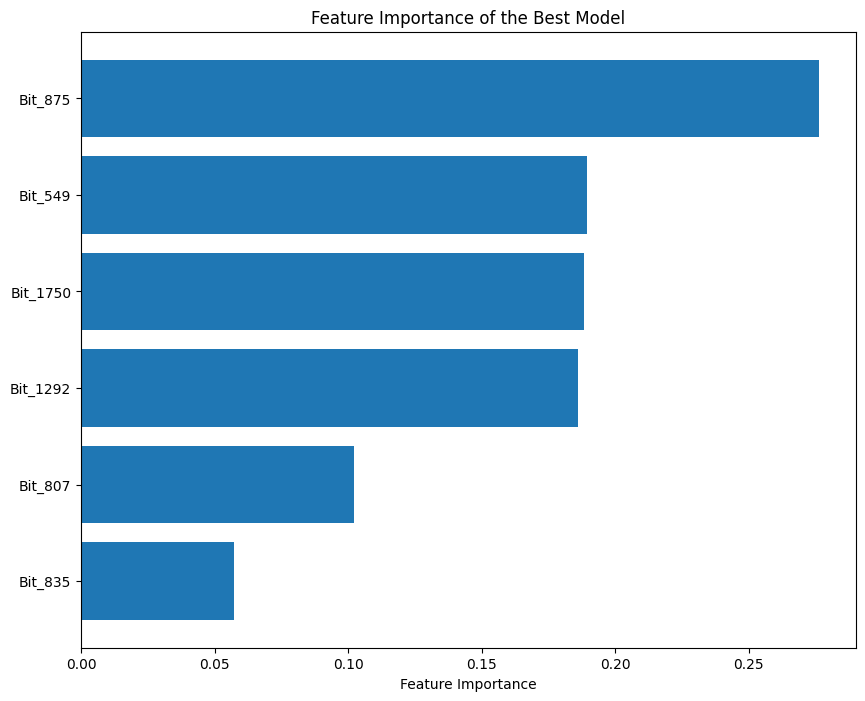

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os

# Assuming X_train and y_train are already defined

# Custom scorers
roc_auc_scorer = make_scorer(roc_auc_score)
f1_scorer = make_scorer(f1_score)

# Split the dataset with stratification
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=111, stratify=y_train
)

# Initialize the XGBoost classifier
model = XGBClassifier(
    use_label_encoder=False, 
    random_state=111, 
    eval_metric='auc', 
    n_jobs=-1,
    colsample_bytree=0.8,
    subsample=0.8
)

# Parameter grid for Grid Search
param_grid = {
    'eta': [0.1, 0.2, 0.3, 0.5],
    'gamma': [0.1, 0.5, 0.8, 1, 1.2],
    'max_depth': [2, 3, 4, 5, 6]
}

# Variables to track the best model and score
best_score = -np.inf
best_num_features = 0
best_model = None
best_support = None

# Iterate through a range of features
for num_features in range(5, 16, 1):
    # Recursive Feature Elimination
    rfe = RFE(estimator=model, n_features_to_select=num_features, step=1)
    rfe.fit(X_train_grid, y_train_grid)

    # Grid Search with cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=f1_scorer,
        cv=StratifiedKFold(5),
        n_jobs=-1
    )
    grid_search.fit(X_train_grid.iloc[:, rfe.support_], y_train_grid)

    # Evaluate the model
    X_test_selected = X_test_grid.iloc[:, rfe.support_]
    y_pred = grid_search.best_estimator_.predict(X_test_selected)
    test_f1 = f1_score(y_test_grid, y_pred)

    # Update the best model if the current one is better
    if test_f1 > best_score:
        best_score = test_f1
        best_num_features = num_features
        best_model = grid_search.best_estimator_
        best_support = rfe.support_

# Function to print the best parameters
def print_selected_parameters(model, param_grid):
    selected_params = {param: model.get_params()[param] for param in param_grid}
    print("Best parameters found: ", selected_params)

# Display results
print(f"Best number of features: {best_num_features}")
print_selected_parameters(best_model, param_grid.keys())
print("Best F1 score on test set: ", best_score)


# Ensure the charts directory exists
os.makedirs('charts', exist_ok=True)

# Plot feature importances
importance = best_model.feature_importances_
features = X_train.columns[best_support]

# Sort the features by importance
sorted_indices = np.argsort(importance)[::-1]
sorted_features = features[sorted_indices]
sorted_importance = importance[sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of the Best Model')
plt.gca().invert_yaxis()  # Highest importance at the top

# Save the plot
plt.savefig('charts/feature_importance.png')
plt.show()


#### PDP plots

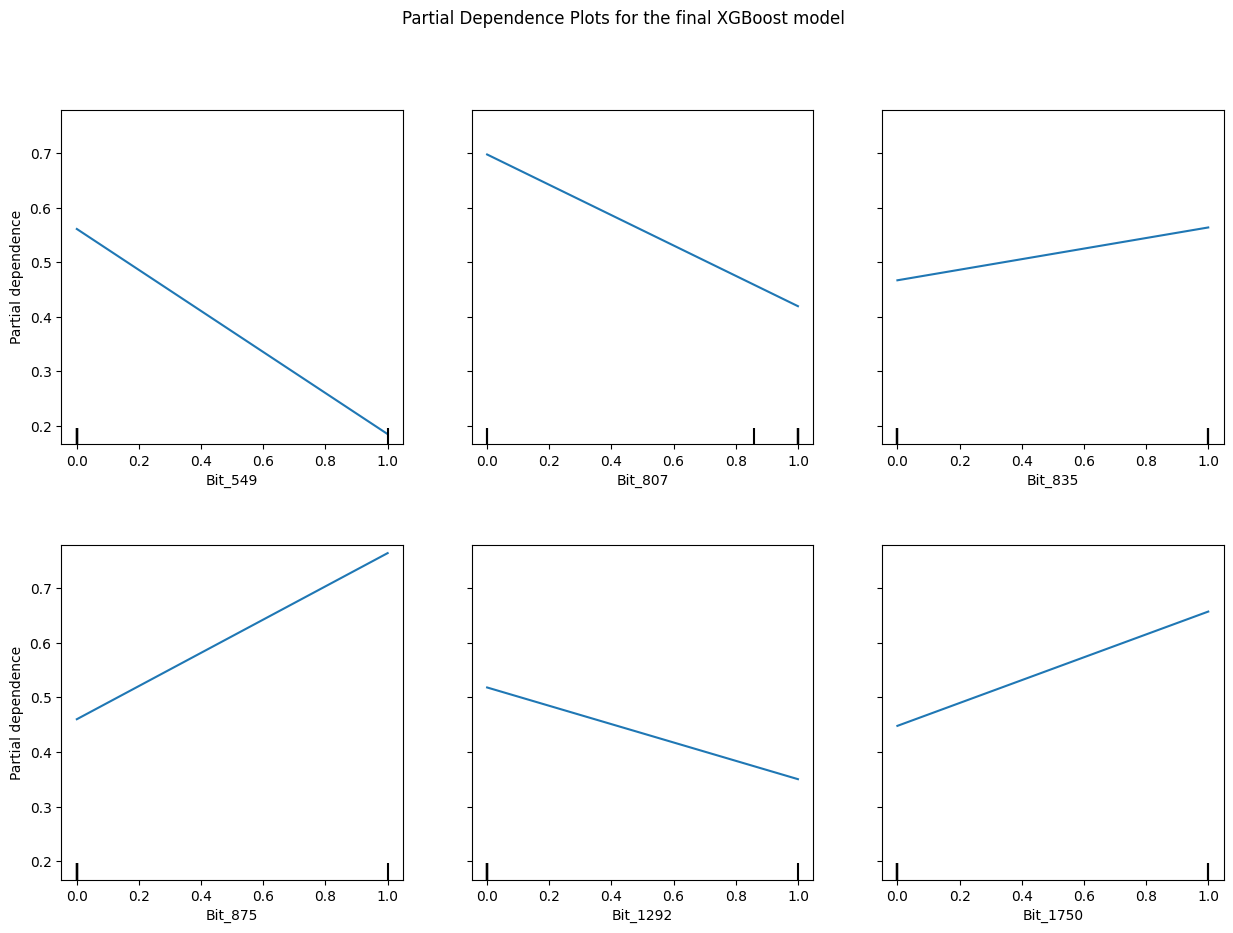

In [122]:
import os
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Create 'charts' directory if it doesn't exist
charts_dir = 'charts'
os.makedirs(charts_dir, exist_ok=True)

# Get feature names of the selected features
selected_feature_names = X_train_grid.columns[best_support]

# Create the partial dependence plot
fig, ax = plt.subplots(figsize=(15, 10))
pdp_display = PartialDependenceDisplay.from_estimator(
    estimator=best_model,
    X=X_train_grid.iloc[:, best_support],
    features=selected_feature_names,
    kind='average',
    ax=ax,
    grid_resolution=20  # Higher resolution for finer plots
)

# Enhance plot aesthetics\

pdp_display.figure_.suptitle('Partial Dependence Plots for the final XGBoost model')
pdp_display.figure_.subplots_adjust(hspace=0.3)

# Save the plot to the 'charts' directory
output_path = os.path.join(charts_dir, 'partial_dependence_plots.png')
plt.savefig(output_path, dpi=300)
plt.show()


In [123]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

X_train_selected = X_train_grid.iloc[:, best_support]

# Evaluate the new best model (obtained from the latest hyperparameter tuning) on the training data
y_pred_train = best_model.predict(X_train_selected)
cm_train = confusion_matrix(y_train_grid, y_pred_train)
tn, fp, fn, tp = cm_train.ravel()

# Calculate performance metrics for the training data
sensitivity_train = tp / (tp + fn) if (tp + fn) > 0 else 0  # Added zero division check
specificity_train = tn / (tn + fp) if (tn + fp) > 0 else 0  # Added zero division check
accuracy_train = accuracy_score(y_train_grid, y_pred_train)
precision_train = precision_score(y_train_grid, y_pred_train, zero_division=0) 
npv_train = tn / (tn + fn) if (tn + fn) > 0 else 0  
f1_train = f1_score(y_train_grid, y_pred_train)
mcc_train = matthews_corrcoef(y_train_grid, y_pred_train)

# Printing results for the training data
print("Classification report on training data:")
print(classification_report(y_train_grid, y_pred_train))
print("Confusion Matrix on training data:", cm_train)
print(f"Sensitivity: {sensitivity_train:.2f}")
print(f"Specificity: {specificity_train:.2f}")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Negative Predictive Value: {npv_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")
print(f"MCC: {mcc_train:.2f}")


Classification report on training data:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        53
           1       0.79      0.84      0.81        55

    accuracy                           0.81       108
   macro avg       0.81      0.80      0.81       108
weighted avg       0.81      0.81      0.81       108

Confusion Matrix on training data: [[41 12]
 [ 9 46]]
Sensitivity: 0.84
Specificity: 0.77
Accuracy: 0.81
Precision: 0.79
Negative Predictive Value: 0.82
F1 Score: 0.81
MCC: 0.61


# Testing on unseen data

In [124]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Transform the unseen data using the selected features
X_test_unseen_selected = X_test_unseen.iloc[:, best_support]

# Predict using the best model found from grid search
y_pred_unseen = best_model.predict(X_test_unseen_selected)

# Evaluate the predictions
conf_matrix = confusion_matrix(y_test_unseen, y_pred_unseen)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate evaluation metrics
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
accuracy = accuracy_score(y_test_unseen, y_pred_unseen)
precision = precision_score(y_test_unseen, y_pred_unseen, zero_division=0)
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
mcc = matthews_corrcoef(y_test_unseen, y_pred_unseen)
f1 = f1_score(y_test_unseen, y_pred_unseen)

# Print the results
print(f"Sensitivity (Recall or True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Positive Predictive Value): {precision:.2f}")
print(f"Negative Predictive Value: {npv:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Matthews Correlation Coefficient: {mcc:.2f}")


Sensitivity (Recall or True Positive Rate): 0.83
Specificity (True Negative Rate): 0.71
Accuracy: 0.77
Precision (Positive Predictive Value): 0.75
Negative Predictive Value: 0.80
F1 Score: 0.79
Matthews Correlation Coefficient: 0.54


#  ROC and the precision-recall curve for training data.

Features used for model training: ['Bit_549', 'Bit_807', 'Bit_835', 'Bit_875', 'Bit_1292', 'Bit_1750']
Features in X_train_selected: ['Bit_549', 'Bit_807', 'Bit_835', 'Bit_875', 'Bit_1292', 'Bit_1750']


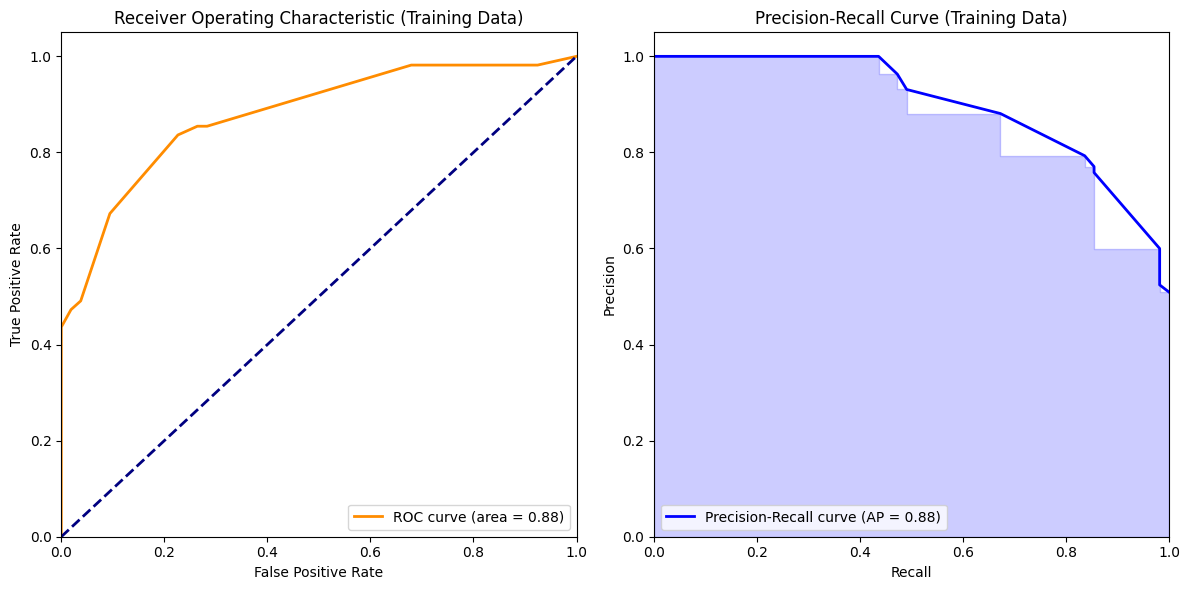

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import os

# Display the features used for model training and the selected features
print("Features used for model training:", best_model.get_booster().feature_names)
print("Features in X_train_selected:", X_train_selected.columns.tolist())

# Predict probabilities for the positive class
y_scores_train = best_model.predict_proba(X_train_selected)[:, 1]

# Ensure the lengths of actual and predicted values match
if len(y_train_grid) == len(y_scores_train):
    # Calculate ROC Curve metrics
    fpr_train, tpr_train, thresholds_roc = roc_curve(y_train_grid, y_scores_train)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Calculate Precision-Recall Curve metrics
    precision_train, recall_train, thresholds_pr = precision_recall_curve(y_train_grid, y_scores_train)
    average_precision_train = average_precision_score(y_train_grid, y_scores_train)

    # Create plots
    plt.figure(figsize=(12, 6))

    # Subplot 1: ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Training Data)')
    plt.legend(loc="lower right")

    # Subplot 2: Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall_train, precision_train, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_train)
    plt.fill_between(recall_train, precision_train, step='post', alpha=0.2, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve (Training Data)')
    plt.legend(loc="lower left")

    plt.tight_layout()

    # Ensure the 'charts' directory exists
    output_directory = 'charts'
    os.makedirs(output_directory, exist_ok=True)

    # Save the figure
    plot_path = os.path.join(output_directory, 'roc_precision_recall_training.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()
else:
    print("Mismatch in the number of training samples and predictions, cannot plot ROC or Precision-Recall curve.")


# Plotting the learning curve

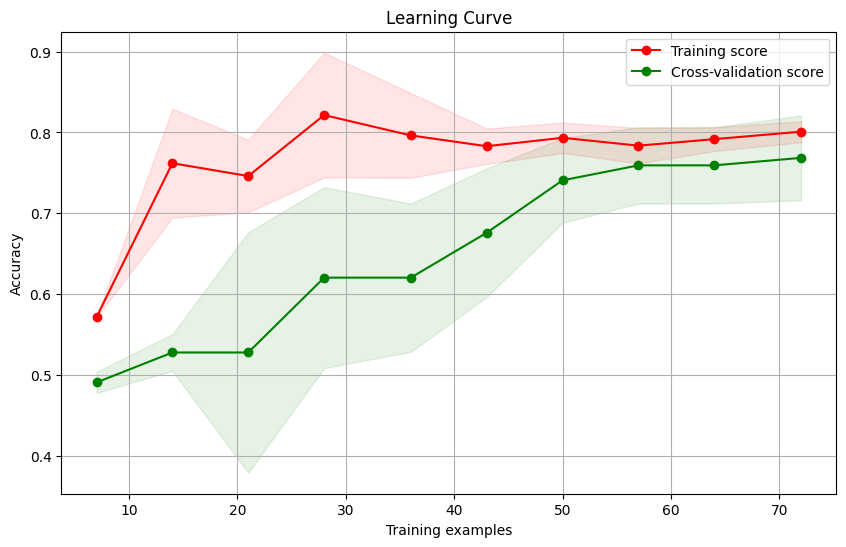

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
import os

# `best_model` and `X_train_selected` have been defined from the previous context

# Set up the parameters for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,  # Use the new best model from hyperparameter tuning
    X=X_train_selected,  # Ensure this uses the correct selected features
    y=y_train_grid,  # Training labels
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=StratifiedKFold(3, shuffle=True, random_state=1),  # Shuffle data to ensure balanced classes
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'  # Raise error to debug
)

# Calculate mean and standard deviation for training and test set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Creating the plot
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)

# Check if the directory exists and create it if it doesn't
output_directory = 'charts'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the figure
plt.savefig(f'{output_directory}/learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()


# ROC Curve, Precision-Recall Curve on unseen data


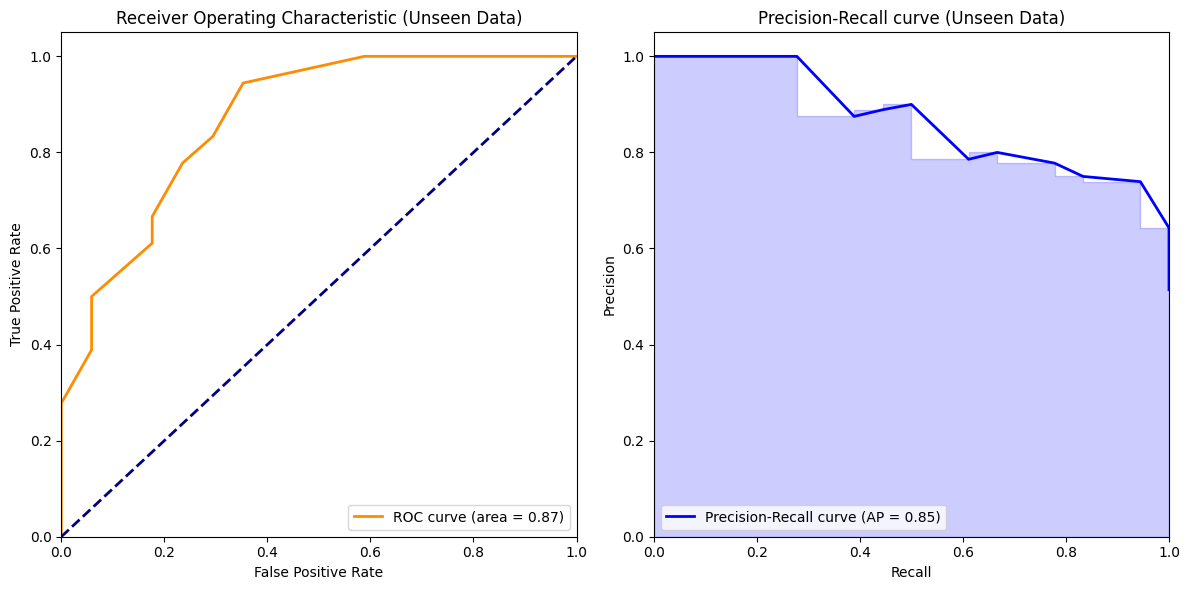

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import os

# Ensure the data is prepared similarly to the training phase
y_scores_unseen = best_model.predict_proba(X_test_unseen_selected)[:, 1]

# ROC Curve for unseen data
fpr_unseen, tpr_unseen, thresholds_roc_unseen = roc_curve(y_test_unseen, y_scores_unseen)
roc_auc_unseen = auc(fpr_unseen, tpr_unseen)

# Precision-Recall Curve for unseen data
precision_unseen, recall_unseen, thresholds_pr_unseen = precision_recall_curve(y_test_unseen, y_scores_unseen)
average_precision_unseen = average_precision_score(y_test_unseen, y_scores_unseen)

# Plotting both ROC and Precision-Recall Curve
plt.figure(figsize=(12, 6))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_unseen, tpr_unseen, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_unseen)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Unseen Data)')
plt.legend(loc="lower right")

# Subplot 2: Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_unseen, precision_unseen, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_unseen)
plt.fill_between(recall_unseen, precision_unseen, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve (Unseen Data)')
plt.legend(loc="lower left")

plt.tight_layout()

# Check if the directory exists
output_directory = 'charts'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the figure
plt.savefig(f'{output_directory}/roc_precision_recall_unseen.png', dpi=300, bbox_inches='tight')

# display the plot
plt.show()


# Shap values for feature interaction plots

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html#

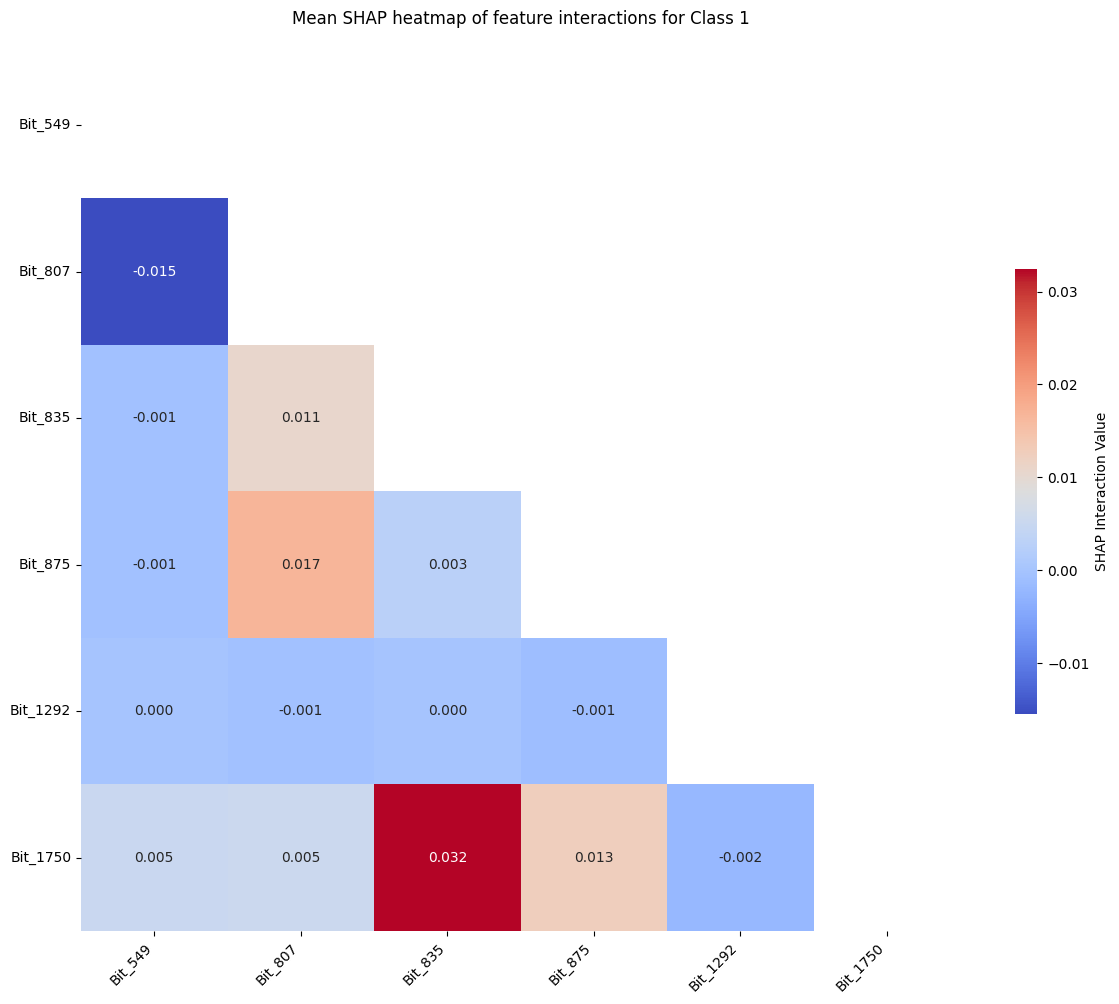

In [128]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load model and data
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_selected)

# Compute SHAP interaction values for the positive class (class 1)
if isinstance(shap_values, list):
    shap_interaction_values = explainer.shap_interaction_values(X_train_selected)[1]
else:
    shap_interaction_values = explainer.shap_interaction_values(X_train_selected)

# Aggregate interaction values across all samples (mean over the 0th axis)
mean_shap_interaction_values = np.mean(shap_interaction_values, axis=0)

# Mask the upper triangle and diagonal to focus only on interaction pairs
mask = np.triu(np.ones_like(mean_shap_interaction_values, dtype=bool))

# Set up a large figure for clearer visualization
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(mean_shap_interaction_values, mask=mask, annot=True, cmap='coolwarm',
            cbar_kws={'shrink': 0.5, 'label': 'SHAP Interaction Value'},  # Customize colorbar
            square=True, fmt=".3f",  # Adjusted to format numbers to three decimal places
            xticklabels=X_train_selected.columns,
            yticklabels=X_train_selected.columns)

# Improve aesthetics
plt.title("Mean SHAP heatmap of feature interactions for Class 1", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust the layout to make room for label rotations

# Save the figure with high resolution
plt.savefig('charts/mean_feature_interaction_heatmap_class_1.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Inspecting Features

In [129]:
import pandas as pd
import os

# Load the data
file_path = 'aggregated_plants.csv'
df = pd.read_csv(file_path)

# List of important features from the model 
important_features = [
    'Bit_549',
    'Bit_835',
    'Bit_807',
    'Bit_875',
    'Bit_1292',
    'Bit_1750'
]



save_dir = './features/' 

# Check if the directory exists, if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterating through each important feature
for feature in important_features:
    # Filter rows where the feature is present (1)
    feature_present_df = df[df[feature] == 1]
    
    # Drop all other 'Bit_' columns except the one in focus
    columns_to_drop = [col for col in df.columns if col.startswith('Bit_') and col != feature]
    feature_present_df = feature_present_df.drop(columns=columns_to_drop)
    
    # Define the new file path
    new_file_path = save_dir + f"{feature}.csv"
    
    # Save the filtered rows to a new CSV file
    feature_present_df.to_csv(new_file_path, index=False)
    
    print(f"Rows where {feature} is present and all other Bit_ columns are removed have been saved to '{new_file_path}'")


Rows where Bit_549 is present and all other Bit_ columns are removed have been saved to './features/Bit_549.csv'
Rows where Bit_835 is present and all other Bit_ columns are removed have been saved to './features/Bit_835.csv'
Rows where Bit_807 is present and all other Bit_ columns are removed have been saved to './features/Bit_807.csv'
Rows where Bit_875 is present and all other Bit_ columns are removed have been saved to './features/Bit_875.csv'
Rows where Bit_1292 is present and all other Bit_ columns are removed have been saved to './features/Bit_1292.csv'
Rows where Bit_1750 is present and all other Bit_ columns are removed have been saved to './features/Bit_1750.csv'


# Adding SMILES-Chemical pairs, Chemical names, and Concentrations


In [130]:
import pandas as pd
import os
import ast
from collections import Counter
import glob

def safe_literal_eval(s):
    dict_strings = [d.strip() for d in s.split(';') if d.strip()]
    all_dicts = {}
    for dict_str in dict_strings:
        try:
            all_dicts.update(ast.literal_eval(dict_str))
        except Exception as e:
            print(f"Failed to parse part: {dict_str}\nError: {e}")
    return all_dicts

def preprocess_bit_name(bit_name):
    bit_number = bit_name.replace('Bit_', '').replace('.csv', '')
    return int(bit_number)

features_dir = 'features/'
reorganized_plants_path = 'reorganized_plants_filtered.csv'
combined_chemicals_path = '../initial_data/matched_chemicals_final_manual.csv'

reorganized_plants_df = pd.read_csv(reorganized_plants_path)
combined_chemicals_df = pd.read_csv(combined_chemicals_path)  # Load the combined chemicals data
reorganized_plants_df = reorganized_plants_df.drop_duplicates(subset=['Plant_Species', 'Chemical'])

assert 'Concentration' in reorganized_plants_df.columns, "Concentration column not found in the reorganized plants data!"

bit_files = glob.glob(os.path.join(features_dir, 'Bit_*.csv'))

for bit_file in bit_files:
    bit_name = os.path.basename(bit_file)
    bit_name = bit_name.replace('.csv', '')

    new_bit_file = os.path.join(features_dir, f"{bit_name}_updated.csv")

    bit_df = pd.read_csv(bit_file)

    bit_df['BitInterpretations'] = bit_df['BitInterpretations'].apply(safe_literal_eval)

    if 'SMILES' not in bit_df.columns:
        bit_df.insert(3, 'SMILES', '')
    if 'Chemical' not in bit_df.columns:
        bit_df.insert(4, 'Chemical', '')
    if 'Chemical_name' not in bit_df.columns:  # Add Chemical_name column 
        bit_df.insert(5, 'Chemical_name', '')

    expanded_rows = []

    for index, row in bit_df.iterrows():
        plant_species = row['Plant_Species']
        bit_interpretations = row['BitInterpretations']
        bit_number = preprocess_bit_name(bit_name)

        if bit_number in bit_interpretations:
            interpreted_bit = str(bit_interpretations[bit_number])
        else:
            interpreted_bit = ''

        matching_rows = reorganized_plants_df[
            (reorganized_plants_df['Plant_Species'].str.lower() == plant_species.lower()) &
            (reorganized_plants_df[bit_name] == 1)]

        for _, match in matching_rows.iterrows():
            new_row = row.copy()
            new_row['SMILES'] = match['SMILES']
            new_row['Chemical'] = match['Chemical']
            new_row['BitInterpretations'] = interpreted_bit
            new_row['Chemical_name'] = combined_chemicals_df[combined_chemicals_df['SMILES'] == match['SMILES']]['Chemical Name'].iloc[0]

            # Ensure matching both 'SMILES' and 'Plant_Species'
            concentration_match = reorganized_plants_df[
                (reorganized_plants_df['SMILES'] == match['SMILES']) & 
                (reorganized_plants_df['Plant_Species'].str.lower() == plant_species.lower())
            ]['Concentration']

            new_row['Concentration'] = concentration_match.iloc[0] if not concentration_match.empty else None

            expanded_rows.append(new_row)

    expanded_bit_df = pd.DataFrame(expanded_rows)

    # Remove the 'Chemical' column as it's no longer needed
    expanded_bit_df = expanded_bit_df.drop(columns=['Chemical'])

    expanded_bit_df = expanded_bit_df.sort_values(by='Chemical_name', ascending=True)

    expanded_bit_df.to_csv(new_bit_file, index=False)

    print(f"Updated {bit_name} with individual SMILES, Chemical names from combined file has been saved to {new_bit_file}")

print("All Bit files have been processed and updated with individual SMILES-Chemical pairs, Chemical names, and Concentrations.")


Updated Bit_807 with individual SMILES, Chemical names from combined file has been saved to features/Bit_807_updated.csv
Updated Bit_875 with individual SMILES, Chemical names from combined file has been saved to features/Bit_875_updated.csv
Updated Bit_1750 with individual SMILES, Chemical names from combined file has been saved to features/Bit_1750_updated.csv
Updated Bit_1292 with individual SMILES, Chemical names from combined file has been saved to features/Bit_1292_updated.csv
Updated Bit_835 with individual SMILES, Chemical names from combined file has been saved to features/Bit_835_updated.csv
Updated Bit_549 with individual SMILES, Chemical names from combined file has been saved to features/Bit_549_updated.csv
All Bit files have been processed and updated with individual SMILES-Chemical pairs, Chemical names, and Concentrations.


# Remove all rare chemicals which appear only once (not interesting for the domain)

In [131]:
import pandas as pd
import os
import glob

features_dir = 'features/'

# Gather all updated CSV files
updated_files = glob.glob(os.path.join(features_dir, '*_updated.csv'))

# Process each CSV file independently
for file in updated_files:
    df = pd.read_csv(file)
    # Count the occurrences of each chemical name in this specific file
    chemical_name_counts = df['Chemical_name'].value_counts()
    # Identify chemical names that appear more than once
    chemicals_to_keep = chemical_name_counts[chemical_name_counts > 1].index
    
    # Filter the dataframe to only include rows with chemical names that appear more than once
    filtered_df = df[df['Chemical_name'].isin(chemicals_to_keep)]
    
    # Save the filtered dataframe back to the same CSV file
    filtered_df.to_csv(file, index=False)
    print(f"Filtered data saved back to {file}")

print("All updated CSV files have been re-processed to exclude unique chemical names.")


Filtered data saved back to features/Bit_875_updated.csv
Filtered data saved back to features/Bit_549_updated.csv
Filtered data saved back to features/Bit_1750_updated.csv
Filtered data saved back to features/Bit_1292_updated.csv
Filtered data saved back to features/Bit_835_updated.csv
Filtered data saved back to features/Bit_807_updated.csv
All updated CSV files have been re-processed to exclude unique chemical names.


# Visualisation of molecular features

In [132]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw
import os

important_features = [
    'Bit_549',
    'Bit_835',
    'Bit_807',
    'Bit_875',
    'Bit_1292',
    'Bit_1750'
]


# Define the output folder for SVG images
output_folder = 'visualizations'  # Adjust as needed
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

for feature in important_features:
    bit_number = feature.split('_')[1]  # Extract the bit number from the feature name
    updated_file_path = f'features/{feature}_updated.csv'  # Construct the file path dynamically
    
    try:
        df = pd.read_csv(updated_file_path)
    except FileNotFoundError:
        print(f"File {updated_file_path} not found, skipping.")
        continue

    bit_to_visualize = int(bit_number)  # Convert the bit number to an integer

    for idx, row in df.drop_duplicates(subset='SMILES').iterrows():
        smiles = row['SMILES']
        chemical_name = row.get('Chemical_name', 'Unnamed_Chemical')  # Default name if not present
        plant_species = row.get('Plant_Species', 'UnknownSpecies').split()[:2]  # Get first two words of plant species
        concentration = row.get('Concentration', 0)  # Get concentration value, default to 0 if not present

        # Generate a molecule from the SMILES string
        mol = Chem.MolFromSmiles(smiles)
        if not mol: continue  # Skip if molecule can't be created

        # Generate a Morgan fingerprint and save information about the bits that are set
        bit_info = {}
        fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bit_info)

        if bit_to_visualize in bit_info:
            # Visualize the first example of the bit setting
            whichExample = 0  # Always use the first example
            img = Draw.DrawMorganBit(mol, bit_to_visualize, bit_info, whichExample=whichExample, useSVG=True)
            
            # Ensure the chemical name, plant species, and concentration are filesystem safe
            safe_chemical_name = ''.join(e for e in chemical_name if e.isalnum())
            safe_plant_species = '_'.join(''.join(e for e in word if e.isalnum()) for word in plant_species)
            safe_concentration = ''.join(e for e in str(concentration) if e.isdigit() or e == '.')  # Convert float to string

            # Filename includes the bit, chemical name, plant species, and concentration
            svg_file_path = os.path.join(output_folder, f"bit_{bit_to_visualize}_{safe_chemical_name}_{safe_plant_species}_conc_{safe_concentration}.svg")
            with open(svg_file_path, "w") as svg_file:
                svg_file.write(img.data)
            print(f"Saved SVG image to {svg_file_path}")


Saved SVG image to visualizations/bit_549_Bicyclogermacrene_Neolitsea_brassii_conc_0.126.svg
Saved SVG image to visualizations/bit_549_alphaPinene_Cupressocyparis_leylandii_conc_0.1.svg
Saved SVG image to visualizations/bit_549_betaPinene_Piper_nigrum_conc_0.0963.svg
Saved SVG image to visualizations/bit_549_delta3Carene_Pinus_mugo_conc_0.162.svg
Saved SVG image to visualizations/bit_835_EAnethole_Foeniculum_vulgare_conc_0.7604.svg
Saved SVG image to visualizations/bit_835_Bicyclogermacrene_Neolitsea_brassii_conc_0.126.svg
Saved SVG image to visualizations/bit_835_Ethylcinnamate_Elaeagnus_angustifolia_conc_0.3279.svg
Saved SVG image to visualizations/bit_835_GermacreneD_Lonicera_japonica_conc_0.28.svg
Saved SVG image to visualizations/bit_835_Limonene_Levisticum_officinale_conc_0.0906.svg
Saved SVG image to visualizations/bit_835_alphaTerpineol_Lithraea_ternifolia_conc_0.093.svg
Saved SVG image to visualizations/bit_835_alphaTerpinylacetate_Thymus_serpyllum_conc_0.096.svg
Saved SVG ima

# Get the names of the chemicals contatinig the feature

In [138]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('features/Bit_807_updated.csv')

# Ensure that the column you're interested in is named 'Chemical name'
# Convert all names in 'Chemical name' to lowercase
lowercase_names = df['Chemical_name'].str.lower()

# Get unique names
unique_names = lowercase_names.unique()

# Join the unique names into a comma-separated string
names_string = ', '.join(unique_names)

# Print the result
print(names_string)


(e)-beta-ocimene, 2-phenylethanol, borneol, carvacrol, carvone, citronellal, citronellol, ethyl cinnamate, eugenol, eugenyl acetate, geranial, geraniol, geranyl acetate, hexadecanoic acid, limonene, linalool, linalyl acetate, linolenic acid, menthol, methyl benzoate, myrcene, terpinen-4-ol, thymol, alpha-farnesene, alpha-terpineol, alpha-terpinyl acetate, beta-bisabolene, beta-elemene


## SVG to PNG

In [133]:
import subprocess
import os

# Define the source and target directories
source_dir = "/Users/mariiakokina/Documents/eo_database/extra_trees/visualizations"
target_dir = source_dir  

# List all SVG files in the source directory
svg_files = [f for f in os.listdir(source_dir) if f.endswith('.svg')]

# Convert each SVG file to PNG using Inkscape
for svg_file in svg_files:
    source_path = os.path.join(source_dir, svg_file)
    target_path = os.path.join(target_dir, svg_file.replace('.svg', '.png'))
    
    # Construct the Inkscape command for conversion
    # Adding --export-dpi=300 for the DPI setting
    # Inkscape 1.0 and later versions handle transparency by default for PNG exports
    command = [
        '/Applications/Inkscape.app/Contents/MacOS/inkscape', 
        source_path, 
        '--export-dpi=300', 
        '--export-type=png', 
        '--export-filename', 
        target_path
    ]
    
    # Execute the command
    subprocess.run(command)

print("Conversion complete.")




Converted visualizations/bit_1750_Furfural_Tamarindus_indica_conc_0.7239.svg to visualizations/bit_1750_Furfural_Tamarindus_indica_conc_0.7239.png
Converted visualizations/bit_807_Geraniol_Rosa_damascena_conc_0.18.svg to visualizations/bit_807_Geraniol_Rosa_damascena_conc_0.18.png
Converted visualizations/bit_1750_Thymol_Origanum_glandulosum_conc_0.225.svg to visualizations/bit_1750_Thymol_Origanum_glandulosum_conc_0.225.png
Converted visualizations/bit_1750_Carvacrol_Thymus_satureoides_conc_0.2.svg to visualizations/bit_1750_Carvacrol_Thymus_satureoides_conc_0.2.png
Converted visualizations/bit_1292_Menthol_Mentha_piperita_conc_0.412.svg to visualizations/bit_1292_Menthol_Mentha_piperita_conc_0.412.png
Converted visualizations/bit_835_Bicyclogermacrene_Neolitsea_brassii_conc_0.126.svg to visualizations/bit_835_Bicyclogermacrene_Neolitsea_brassii_conc_0.126.png
Converted visualizations/bit_807_Thymol_Thymus_zygis_conc_0.5165.svg to visualizations/bit_807_Thymol_Thymus_zygis_conc_0.5165

Converted visualizations/bit_1292_Borneol_Thymus_satureoides_conc_0.2.svg to visualizations/bit_1292_Borneol_Thymus_satureoides_conc_0.2.png
Converted visualizations/bit_835_betaBisabolene_Thymus_richardii_conc_0.323.svg to visualizations/bit_835_betaBisabolene_Thymus_richardii_conc_0.323.png
